In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
# Load the dataset
df = pd.read_csv('World_Marriage_Cleaned_Dataset.csv')

In [17]:
# Verify and correct column names if needed
df.columns = df.columns.str.strip()  # Remove any leading/trailing whitespace

In [18]:
if 'Count' not in df.columns:
    df['Population_Count'] = 1

In [20]:
# Select relevant columns
columns = ['Country', 'Age Group', 'Marital Status', 'Population_Count']  # Ensure these columns exist
marriage_data = df[columns].dropna()

# Pivot the data to create a matrix for clustering
pivot_data = marriage_data.pivot_table(index='Country', columns='Age Group', values='Population_Count', fill_value=0)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_data)

# Check scaled data shape
print(scaled_data)

[[ 6.164414   -0.18814417 -0.06551218 ...  0.28867513 -0.09284767
   0.27989465]
 [-0.16222142 -0.18814417 -0.06551218 ...  0.28867513 -0.09284767
   0.27989465]
 [-0.16222142 -0.18814417 -0.06551218 ...  0.28867513 -0.09284767
   0.27989465]
 ...
 [-0.16222142 -0.18814417 -0.06551218 ...  0.28867513 -0.09284767
   0.27989465]
 [-0.16222142 -0.18814417 -0.06551218 ...  0.28867513 -0.09284767
   0.27989465]
 [-0.16222142 -0.18814417 -0.06551218 ...  0.28867513 -0.09284767
   0.27989465]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

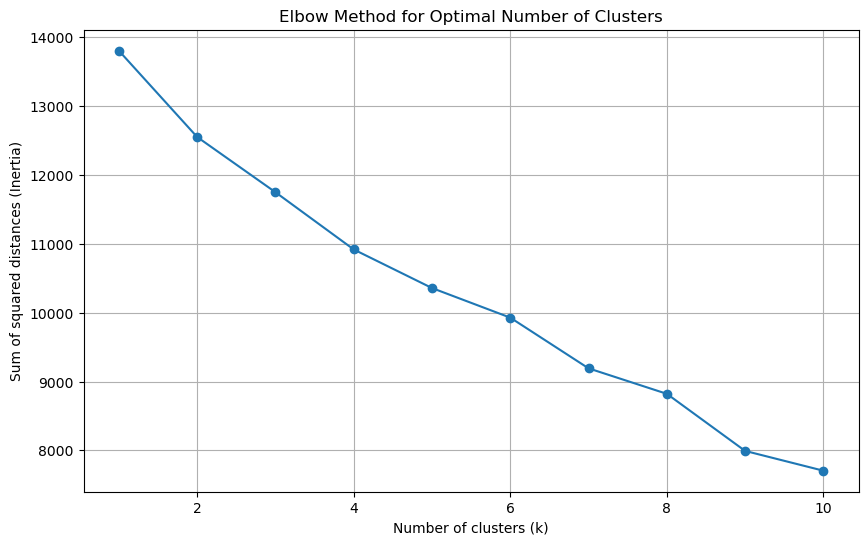

In [28]:
# Use the Elbow method to find the optimal number of clusters
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10,6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.grid(True)
plt.show()

In [22]:
# Apply K-Means with the optimal number of clusters (e.g., k = 4)
optimal_k = 4  # Replace with the optimal k from the Elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the original data
pivot_data['Cluster'] = kmeans.labels_
print(pivot_data.head())

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Age Group       [0-14]  [0-15]  [0-19]  [10-14]  [10-19]  [12-14]  [12-19]  \
Country                                                                      
Afghanistan          1       0       0        1        0        0        0   
Albania              0       0       0        1        0        0        0   
Algeria              0       0       0        1        0        0        0   
American Samoa       0       0       0        1        0        0        0   
Angola               0       0       0        1        0        0        0   

Age Group       [14-19]  [15-17]  [15-19]  ...  [65+]  [65-69]  [65-74]  \
Country                                    ...                            
Afghanistan           0        0        1  ...      1        1        0   
Albania               0        0        1  ...      1        1        0   
Algeria               0        0        1  ...      1        1        0   
American Samoa        0        0        1  ...      1        1        0   
Ang

In [23]:
# Calculate the Silhouette score
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

Silhouette Score for 4 clusters: 0.42536525462212244


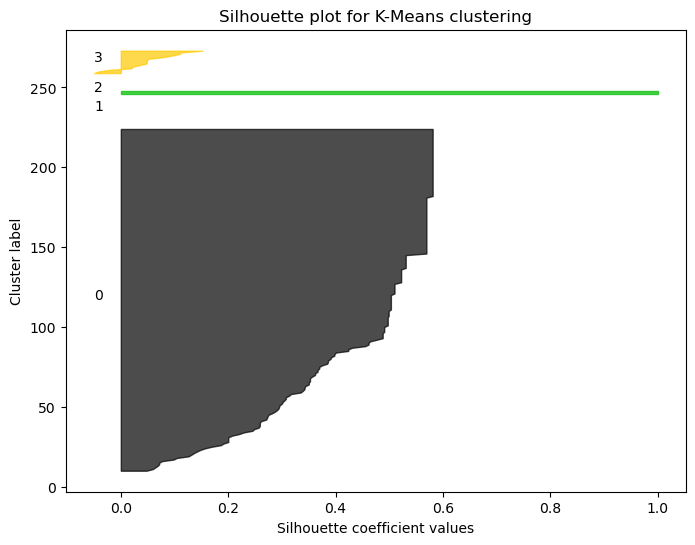

In [24]:
# Optional: Visualize Silhouette Score for each sample
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(scaled_data, kmeans.labels_)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
y_lower = 10
for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / optimal_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette plot for K-Means clustering")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
plt.show()

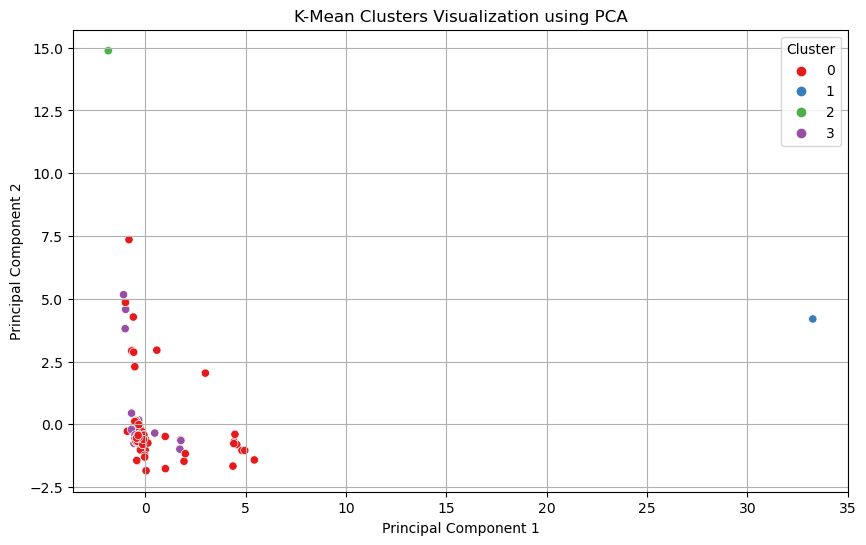

In [27]:
# Perform PCA for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA data
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

# Plot the PCA result with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('K-Mean Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()